<a href="https://colab.research.google.com/github/derewor/Corona-cases/blob/main/Corona_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Data Collection**

In [5]:
df = pd.read_csv('/content/bq-results-20260101-171155-1767287536674.csv')
df.head(2)

,date,place_id,country_code,country_name,aggregation_level,new_confirmed,new_deceased,cumulative_confirmed,cumulative_confirmed_1,cumulative_tested,...,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older,population_density
0,2020-05-20,ChIJ86HCfzUnFIgRxu_HvFterL8,US,United States of America,2,4.0,0.0,73.0,73.0,NaN,...,10321.0,10744.0,10409.0,9639.0,9130.0,10719.0,9495.0,5601.0,2968.0,NaN
1,2020-03-24,ChIJr9pl7cLeFIgRxPrDI46GklE,US,United States of America,2,9.0,0.0,22.0,22.0,NaN,...,15166.0,16338.0,16242.0,15938.0,16501.0,17615.0,15964.0,10008.0,5646.0,NaN


In [39]:
# save the df into csv format with lower size
df.to_csv('corona_data1.csv', index=False)

In [6]:
df_new = pd.read_csv('/content/bq-results-20260102-103124-1767349912751.csv', on_bad_lines='skip')
df_new.head(2)

,date,place_id,country_code,country_name,facial_coverings,average_temperature_celsius,maximum_temperature_celsius,minimum_temperature_celsius,relative_humidity,elevation_m,new_confirmed_male,new_confirmed_female,new_deceased_male,new_deceased_female
0,2020-02-15,ChIJzyjM68dZnAARYz4p8gYVWik,BR,Brazil,0.0,27.074074,33.546296,23.250000,76.289434,NaN,57.0,69.0,NaN,NaN
1,2020-05-02,ChIJQ4Ld14-UC0cRb1jb03UcZvg,CZ,Czech Republic,3.0,10.144444,15.111111,5.533333,65.376120,NaN,8.0,10.0,0.0,1.0


In [40]:
df_new.to_csv('corona_data2.csv', index=False)

## 2. **Data Wrangling**

In [7]:
# determine the dtype and null values in each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220554 entries, 0 to 220553
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   date                         220554 non-null  object 
 1   place_id                     208114 non-null  object 
 2   country_code                 220544 non-null  object 
 3   country_name                 220554 non-null  object 
 4   aggregation_level            220554 non-null  int64  
 5   new_confirmed                72338 non-null   float64
 6   new_deceased                 65323 non-null   float64
 7   cumulative_confirmed         72717 non-null   float64
 8   cumulative_confirmed_1       72717 non-null   float64
 9   cumulative_tested            18659 non-null   float64
 10  population                   208069 non-null  float64
 11  population_male              168790 non-null  float64
 12  population_female            168789 non-null  float64
 13 

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
# how many nulls present in each feature.
df.isna().sum()
# drop rows where the place_id is null.
df1 = df[df['place_id'].notna() & df['country_code'].notna()]
df1.isna().sum()
df1.shape

(208104, 23)

In [10]:
# drop duplicates
df2 = df1.drop_duplicates()
df2.shape

(208103, 23)

In [11]:
# create the date and month columns.

df2['month'] = df['date'].dt.month
df2['day'] = df['date'].dt.day
df2.head()

/tmp/ipython-input-1149495781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month'] = df['date'].dt.month
/tmp/ipython-input-1149495781.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['day'] = df['date'].dt.day


,date,place_id,country_code,country_name,aggregation_level,new_confirmed,new_deceased,cumulative_confirmed,cumulative_confirmed_1,cumulative_tested,...,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older,population_density,month,day
0,2020-05-20,ChIJ86HCfzUnFIgRxu_HvFterL8,US,United States of America,2,4.0,0.0,73.0,73.0,NaN,...,10409.0,9639.0,9130.0,10719.0,9495.0,5601.0,2968.0,NaN,5,20
1,2020-03-24,ChIJr9pl7cLeFIgRxPrDI46GklE,US,United States of America,2,9.0,0.0,22.0,22.0,NaN,...,16242.0,15938.0,16501.0,17615.0,15964.0,10008.0,5646.0,NaN,3,24
2,2020-05-27,ChIJI_JuDtObbIgRFB8B1JTcnuw,US,United States of America,2,1.0,0.0,291.0,291.0,NaN,...,7952.0,7917.0,9147.0,10880.0,8957.0,5048.0,2362.0,NaN,5,27
3,2020-04-24,ChIJLxzD5hMNEogRzCKmh1WJt-Y,US,United States of America,2,1.0,0.0,47.0,47.0,NaN,...,1519.0,1620.0,1685.0,2154.0,1888.0,1202.0,599.0,NaN,4,24
4,2020-03-26,ChIJbQL_-LZu0TgReNqWvg1GtfM,AF,Afghanistan,0,15.0,0.0,106.0,106.0,NaN,...,7035871.0,4534646.0,2963459.0,1840198.0,1057496.0,480455.0,105925.0,59.627,3,26


## 3. **Exploratory Data Analysis (EDA)**

In [12]:
# describe the common statstics.
df2.describe()

,date,aggregation_level,new_confirmed,new_deceased,cumulative_confirmed,cumulative_confirmed_1,cumulative_tested,population,population_male,population_female,...,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older,population_density,month,day
count,208103,208103.000000,69956.000000,63680.000000,7.032200e+04,7.032200e+04,1.826200e+04,2.000260e+05,1.611490e+05,1.611480e+05,...,1.576560e+05,1.577230e+05,1.576500e+05,1.574830e+05,1.573350e+05,1.565340e+05,1.548110e+05,10630.000000,208103.000000,208103.000000
mean,2020-03-31 17:10:33.442093312,1.916753,19.698325,1.073445,8.666282e+02,8.666282e+02,2.221880e+04,7.672835e+05,4.288220e+05,4.232941e+05,...,1.306936e+05,1.296592e+05,1.118026e+05,9.994172e+04,7.146387e+04,3.888981e+04,1.902579e+04,703.700361,3.507859,15.652240
min,2020-01-01 00:00:00,0.000000,-2461.000000,-6.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,1.700000e+01,...,1.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,-1.955000e+03,0.138000,1.000000,1.000000
25%,2020-02-15 00:00:00,2.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,1.700000e+01,4.823000e+03,2.455000e+03,2.393000e+03,...,6.970000e+02,6.340000e+02,5.730000e+02,4.680000e+02,3.340000e+02,2.000000e+02,1.070000e+02,79.500000,2.000000,8.000000
50%,2020-04-01 00:00:00,2.000000,0.000000,0.000000,9.000000e+00,9.000000e+00,8.700000e+01,1.730800e+04,7.494000e+03,7.445000e+03,...,2.215000e+03,1.945000e+03,1.720000e+03,1.424000e+03,1.049000e+03,6.340000e+02,3.350000e+02,159.100000,4.000000,16.000000
75%,2020-05-16 00:00:00,2.000000,2.000000,0.000000,8.200000e+01,8.200000e+01,5.195000e+02,8.052100e+04,2.773400e+04,2.831000e+04,...,8.320000e+03,7.559000e+03,6.738000e+03,6.092000e+03,4.748500e+03,2.837000e+03,1.550000e+03,390.500000,5.000000,23.000000
max,2020-06-30 00:00:00,3.000000,46860.000000,1352.000000,1.805198e+06,1.805198e+06,2.450921e+07,1.439324e+09,7.382473e+08,7.010764e+08,...,2.399021e+08,2.288304e+08,2.161118e+08,2.221859e+08,1.516639e+08,7.149430e+07,2.661810e+07,84383.000000,6.000000,31.000000
std,NaN,0.316271,358.668662,17.461073,1.550658e+04,1.550658e+04,3.230642e+05,1.593190e+07,9.158982e+06,8.667875e+06,...,2.684154e+06,2.820644e+06,2.489930e+06,2.363728e+06,1.630294e+06,7.907600e+05,3.251616e+05,3456.997824,1.711564,8.753466


## **4. Data Analysis**

In [13]:
# How many unique countries have registered corona case in the first six months of 2020?
display(df2['country_code'].nunique())
display(df2['country_name'].nunique())

234

234

In [14]:
# determine the top 20 countries with new confirmed cases of corona.
corona_country = df2.groupby('country_name')['new_confirmed'].sum().reset_index()
corona_country = corona_country.sort_values(by='new_confirmed', ascending=False)
top20_corona_incedence = corona_country.head(20)
bottom20_corona_incedence = corona_country.tail(20)
display(top20_corona_incedence)
# display(bottom20_corona_incedence)

,country_name,new_confirmed
222,United States of America,434699.0
28,Brazil,291415.0
96,India,78581.0
170,Russia,57919.0
161,Peru,51373.0
220,United Kingdom,44352.0
79,Germany,32007.0
194,Spain,30270.0
43,Chile,28581.0
102,Italy,25800.0


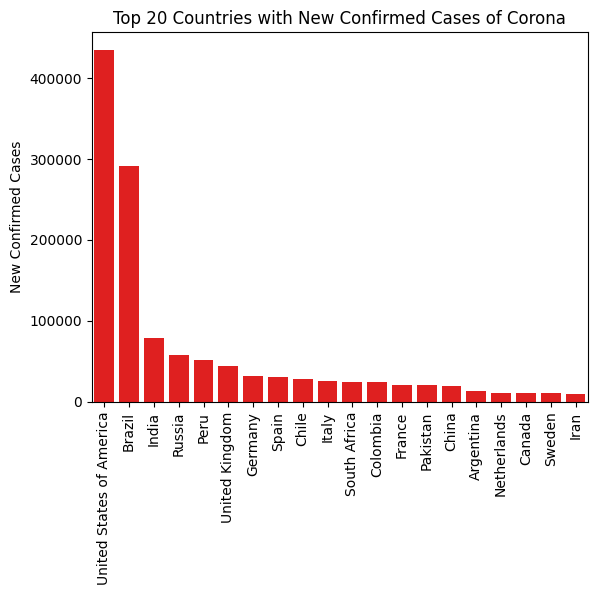

In [15]:
# show with bar the top20 corona affected countries in the first 6 months.
sns.barplot(x='country_name', y='new_confirmed', data=top20_corona_incedence, color='red')
plt.title('Top 20 Countries with New Confirmed Cases of Corona')
plt.ylabel('New Confirmed Cases')
plt.xlabel('')
plt.xticks(rotation=90)
plt.show()

In [16]:
# from how many distinct places in each country the data collected from?
places_country = df2.groupby('country_name')['place_id'].nunique().reset_index(name='place_count')
places_country = places_country.sort_values(by='place_count', ascending=False)
display(places_country.head(20))


,country_name,place_count
28,Brazil,5560
222,United States of America,3281
134,Mexico,2077
161,Peru,1708
194,Spain,1371
101,Israel,1222
47,Colombia,1144
96,India,684
97,Indonesia,542
8,Argentina,519


In [17]:
# calculate the average number of cases identified by each place.
merge_data = pd.merge(corona_country, places_country, on='country_name')
merge_data['cases_per_palce'] = (merge_data['new_confirmed'] / merge_data['place_count']).round(2)
merge_data.sort_values(by='cases_per_palce', ascending=False, inplace=True)
display(merge_data)

,country_name,new_confirmed,place_count,cases_per_palce
19,Iran,9552.0,1,9552.0
20,Turkey,8283.0,1,8283.0
23,Qatar,6603.0,1,6603.0
30,Egypt,3793.0,1,3793.0
31,Saudi Arabia,3705.0,1,3705.0
...,...,...,...,...
229,United States Minor Outlying Islands,0.0,1,0.0
230,Vanuatu,0.0,1,0.0
231,Wallis and Futuna,0.0,1,0.0
232,Western Sahara,0.0,1,0.0


In [18]:
df2.head(2)

,date,place_id,country_code,country_name,aggregation_level,new_confirmed,new_deceased,cumulative_confirmed,cumulative_confirmed_1,cumulative_tested,...,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older,population_density,month,day
0,2020-05-20,ChIJ86HCfzUnFIgRxu_HvFterL8,US,United States of America,2,4.0,0.0,73.0,73.0,NaN,...,10409.0,9639.0,9130.0,10719.0,9495.0,5601.0,2968.0,NaN,5,20
1,2020-03-24,ChIJr9pl7cLeFIgRxPrDI46GklE,US,United States of America,2,9.0,0.0,22.0,22.0,NaN,...,16242.0,15938.0,16501.0,17615.0,15964.0,10008.0,5646.0,NaN,3,24


In [19]:
# How many were died in the first six months of 2020 per country?
deceased_country = df2.groupby('country_name')['new_deceased'].sum().reset_index()
deceased_country = deceased_country.sort_values(by='new_deceased', ascending=False)
display(deceased_country.head(20))

,country_name,new_deceased
222,United States of America,20685.0
28,Brazil,10854.0
161,Peru,6213.0
220,United Kingdom,4794.0
73,France,3467.0
102,Italy,2544.0
37,Canada,2282.0
96,India,2032.0
194,Spain,1983.0
145,Netherlands,1473.0


In [20]:
# Which month has registered the highest number of cases?
cases_month = df2.groupby('month')['new_confirmed'].sum().reset_index()
cases_month

,month,new_confirmed
0,1,2317.0
1,2,19929.0
2,3,111071.0
3,4,269030.0
4,5,432994.0
5,6,542675.0


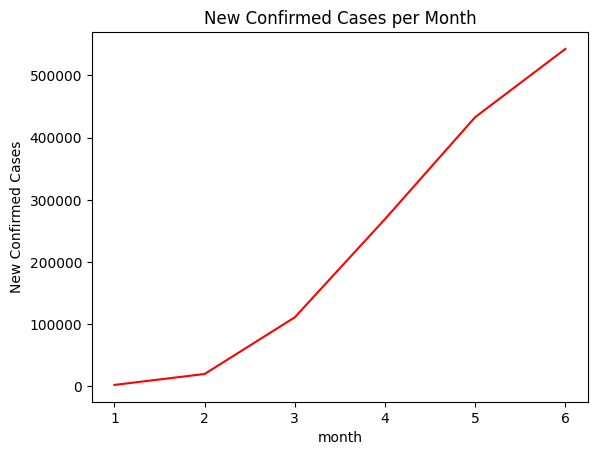

In [21]:
# plot the cases using line plot
sns.lineplot(data=cases_month, x='month', y='new_confirmed', color='red')
plt.title('New Confirmed Cases per Month')
plt.ylabel('New Confirmed Cases')
plt.show()

In [22]:
# repeat the death rates in the first six months of 2020.
death_month = df2.groupby('month')['new_deceased'].sum().reset_index()
death_month

,month,new_deceased
0,1,26.0
1,2,361.0
2,3,5661.0
3,4,20864.0
4,5,21980.0
5,6,19465.0


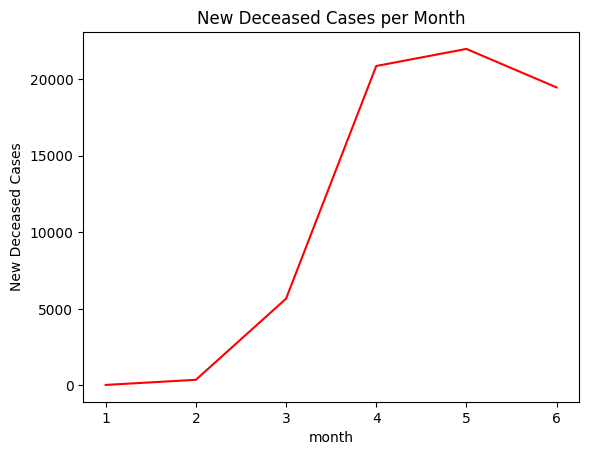

In [23]:
# plot the deaths per month
sns.lineplot(data=death_month, x='month', y='new_deceased', color='red')
plt.title('New Deceased Cases per Month')
plt.ylabel('New Deceased Cases')
plt.show()

In [24]:
# what the proportion of deaths from the positivly tested individuals in the first 6 months.
case_death_ration = pd.merge(cases_month, death_month, how='inner', on='month')
case_death_ration['rate'] = (case_death_ration['new_deceased'] / case_death_ration['new_confirmed']).round(2)
case_death_ration

,month,new_confirmed,new_deceased,rate
0,1,2317.0,26.0,0.01
1,2,19929.0,361.0,0.02
2,3,111071.0,5661.0,0.05
3,4,269030.0,20864.0,0.08
4,5,432994.0,21980.0,0.05
5,6,542675.0,19465.0,0.04


In [25]:
# how the neew cases and death rate changed over the six months.
cases_deaths = df2.groupby(['country_name','date'])[['new_confirmed', 'new_deceased']].sum().reset_index()
cases_deaths
# add a five day rolling average for new_confirmed and new_deceased.
cases_deaths['new_confirmed_rolling'] = cases_deaths['new_confirmed'].rolling(5).mean()
cases_deaths['new_deceased_rolling'] = cases_deaths['new_deceased'].rolling(5).mean()
cases_deaths

,country_name,date,new_confirmed,new_deceased,new_confirmed_rolling,new_deceased_rolling
0,Afghanistan,2020-01-01,0.0,0.0,NaN,NaN
1,Afghanistan,2020-01-02,0.0,0.0,NaN,NaN
2,Afghanistan,2020-01-03,0.0,0.0,NaN,NaN
3,Afghanistan,2020-01-04,0.0,0.0,NaN,NaN
4,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
10515,Zimbabwe,2020-01-19,0.0,0.0,20.0,0.0
10516,Zimbabwe,2020-01-22,0.0,0.0,9.2,0.0
10517,Zimbabwe,2020-02-02,0.0,0.0,9.2,0.0
10518,Zimbabwe,2020-02-23,0.0,0.0,0.0,0.0


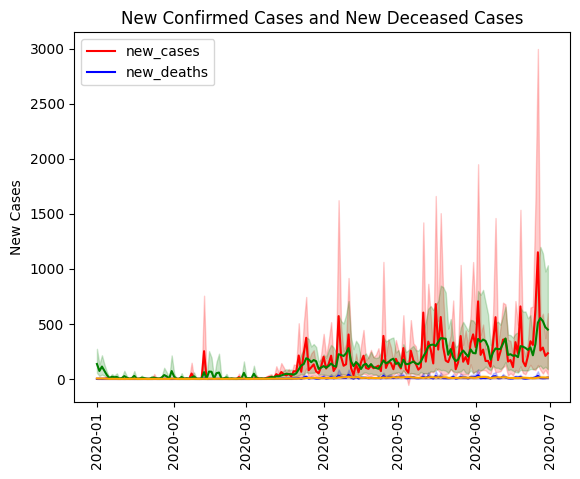

In [26]:
# plot the cases and death in linegraph.
sns.lineplot(data=cases_deaths, x='date', y='new_confirmed', color='red', label='new_cases')
sns.lineplot(data=cases_deaths, x='date', y='new_deceased', color='blue', label='new_deaths')
sns.lineplot(data=cases_deaths, x='date', y='new_confirmed_rolling', color='green')
sns.lineplot(data=cases_deaths, x='date', y='new_deceased_rolling', color='orange')
plt.title('New Confirmed Cases and New Deceased Cases')
plt.ylabel('New Cases')
plt.xlabel('')
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [27]:
df2.columns

Index(['date', 'place_id', 'country_code', 'country_name', 'aggregation_level',
       'new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_confirmed_1', 'cumulative_tested', 'population',
       'population_male', 'population_female', 'population_age_00_09',
       'population_age_10_19', 'population_age_20_29', 'population_age_30_39',
       'population_age_40_49', 'population_age_50_59', 'population_age_60_69',
       'population_age_70_79', 'population_age_80_and_older',
       'population_density', 'month', 'day'],
      dtype='object')

In [28]:
# view the first few rows of the df_new
df_new.head(2)

,date,place_id,country_code,country_name,facial_coverings,average_temperature_celsius,maximum_temperature_celsius,minimum_temperature_celsius,relative_humidity,elevation_m,new_confirmed_male,new_confirmed_female,new_deceased_male,new_deceased_female
0,2020-02-15,ChIJzyjM68dZnAARYz4p8gYVWik,BR,Brazil,0.0,27.074074,33.546296,23.250000,76.289434,NaN,57.0,69.0,NaN,NaN
1,2020-05-02,ChIJQ4Ld14-UC0cRb1jb03UcZvg,CZ,Czech Republic,3.0,10.144444,15.111111,5.533333,65.376120,NaN,8.0,10.0,0.0,1.0


In [29]:
# calculate the dailiy average temperature per country.
df_new['date'] = pd.to_datetime(df_new['date'])
daily_temp = df_new.groupby(['country_name', 'date'])['average_temperature_celsius'].mean().reset_index()
daily_temp = daily_temp.dropna()
daily_temp

,country_name,date,average_temperature_celsius
0,Afghanistan,2020-01-01,3.649691
1,Afghanistan,2020-01-02,5.210185
2,Afghanistan,2020-01-03,1.916667
3,Afghanistan,2020-01-04,2.741093
4,Afghanistan,2020-01-05,12.944444
...,...,...,...
11586,Zambia,2020-06-04,16.388889
11587,Zambia,2020-06-08,15.055556
11588,Zambia,2020-06-20,16.277778
11589,Zambia,2020-06-29,20.000000


In [30]:
# merge the cases_deaths and daily_temp dfs
cases_temp = pd.merge(cases_deaths, daily_temp, how='inner', on=['country_name', 'date'])
cases_temp

,country_name,date,new_confirmed,new_deceased,new_confirmed_rolling,new_deceased_rolling,average_temperature_celsius
0,Afghanistan,2020-01-01,0.0,0.0,NaN,NaN,3.649691
1,Afghanistan,2020-01-02,0.0,0.0,NaN,NaN,5.210185
2,Afghanistan,2020-01-03,0.0,0.0,NaN,NaN,1.916667
3,Afghanistan,2020-01-04,0.0,0.0,NaN,NaN,2.741093
4,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,12.944444
...,...,...,...,...,...,...,...
7806,Venezuela,2020-06-26,6.0,0.0,5.2,0.0,29.583333
7807,Venezuela,2020-06-27,52.0,0.0,15.4,0.0,27.591049
7808,Venezuela,2020-06-28,6.0,0.0,16.6,0.0,28.594136
7809,Venezuela,2020-06-30,67.0,0.0,26.4,0.0,27.324074


In [31]:
# determine the average new_confirmed cases and average temperature in six months.
avg_cases_temp = cases_temp.groupby('country_name')[['new_confirmed', 'average_temperature_celsius']].mean().reset_index()
# determine the correlation between the new_confirmed cases and the average temperature.
display(avg_cases_temp)
corr = avg_cases_temp['new_confirmed'].corr(cases_temp['average_temperature_celsius'])
corr

,country_name,new_confirmed,average_temperature_celsius
0,Afghanistan,17.936170,14.991470
1,Anguilla,0.000000,25.842284
2,Argentina,70.214286,19.267175
3,Australia,33.324324,18.809588
4,Austria,22.703297,7.630014
...,...,...,...
119,United States of America,2388.456044,11.617200
120,Uruguay,0.663043,19.586077
121,Vatican City,0.500000,11.467372
122,Venezuela,3.660550,27.668992


np.float64(0.04452570796677454)

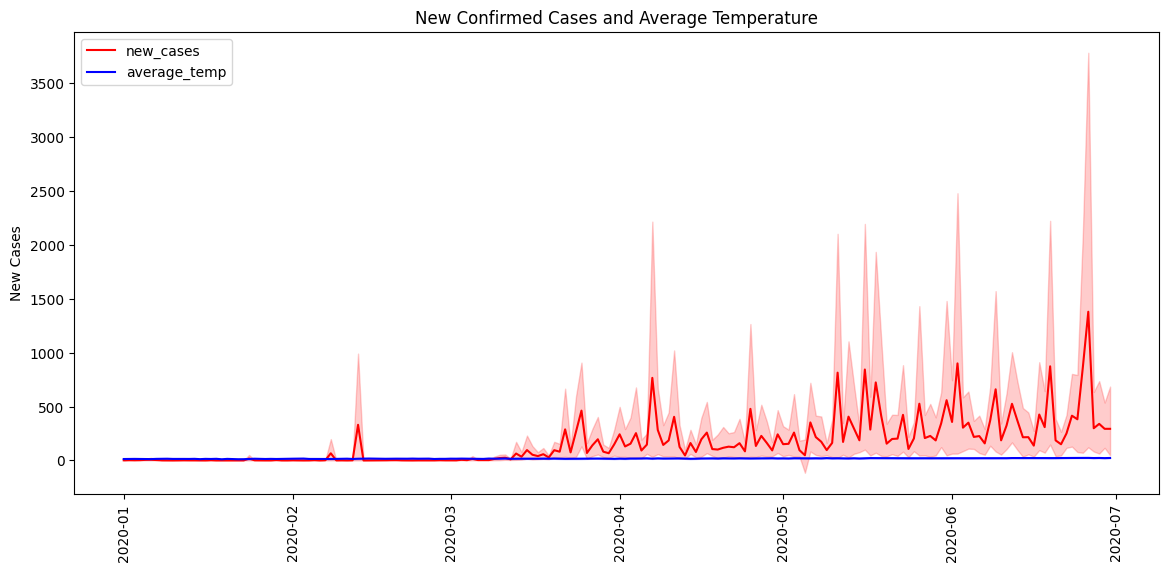

In [32]:
# plot the avg new cases per day
plt.figure(figsize=(14, 6))
sns.lineplot(data=cases_temp, x='date', y='new_confirmed', color='red', label='new_cases')
sns.lineplot(data=cases_temp, x='date', y='average_temperature_celsius', color='blue',label='average_temp')
plt.title('New Confirmed Cases and Average Temperature')
plt.ylabel('New Cases')
plt.xticks(rotation=90)
plt.xlabel('')
plt.show()

In [33]:
# extract the data of USA and try to understand the pattern of cases changes with temperature.
df_usa = df.query('country_name == "United States of America"')
df_new_usa = df_new.query('country_name == "United States of America"')
display(df_usa.shape)
display(df_new_usa.shape)



(31326, 23)

(38511, 14)

In [34]:
# merge the df_usa and df_new_usa based on date and place_id.
df_usa['date'] = pd.to_datetime(df_usa['date'])
merged_usa = pd.merge(df_usa, df_new_usa, how='inner', on=['date', 'place_id'])
merged_usa.head(2)

/tmp/ipython-input-2805359841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa['date'] = pd.to_datetime(df_usa['date'])


,date,place_id,country_code_x,country_name_x,aggregation_level,new_confirmed,new_deceased,cumulative_confirmed,cumulative_confirmed_1,cumulative_tested,...,facial_coverings,average_temperature_celsius,maximum_temperature_celsius,minimum_temperature_celsius,relative_humidity,elevation_m,new_confirmed_male,new_confirmed_female,new_deceased_male,new_deceased_female
0,2020-04-27,ChIJ04p7LZwrQVMRGGwqz1jWcfU,US,United States of America,1,1.0,0.0,449.0,449.0,13033.0,...,1.0,11.238889,17.850000,3.683333,34.684863,1035.0,NaN,NaN,NaN,NaN
1,2020-04-12,ChIJA1lA4f9CkogRQJ4ZtfB9S7Q,US,United States of America,2,NaN,NaN,1.0,1.0,NaN,...,NaN,19.538889,28.766667,9.416667,70.081727,NaN,NaN,NaN,NaN,NaN


In [35]:
# select few columns for analysis
selected_columns = ['date', 'country_name_x', 'place_id', 'new_confirmed', 'new_deceased', 'average_temperature_celsius',
                     'relative_humidity']
selected_usa = merged_usa[selected_columns]
print(selected_usa.shape)
display(selected_usa.head(3))

(1852, 7)


,date,country_name_x,place_id,new_confirmed,new_deceased,average_temperature_celsius,relative_humidity
0,2020-04-27,United States of America,ChIJ04p7LZwrQVMRGGwqz1jWcfU,1.0,0.0,11.238889,34.684863
1,2020-04-12,United States of America,ChIJA1lA4f9CkogRQJ4ZtfB9S7Q,NaN,NaN,19.538889,70.081727
2,2020-06-07,United States of America,ChIJsW6IsdGsh4gRB47NLHyT1b4,1.0,0.0,26.483333,76.776128


In [36]:
# how many distinct place ids exist in the dataframe and how many total case registered, deceased average temperature registered.
selected_usa['place_id'].nunique()
cases_place = selected_usa.groupby('place_id').agg({'new_confirmed': 'mean', 'new_deceased': 'mean', 'average_temperature_celsius': 'mean',
                                                    'relative_humidity': 'mean'}).reset_index()
cases_place.sort_values(by='new_confirmed', ascending=False).head(20)
cases_sorted = cases_place.query("new_confirmed < 1000")
cases_sorted.head()

,place_id,new_confirmed,new_deceased,average_temperature_celsius,relative_humidity
0,ChIJ--AcKoV93ocRvdNVa_DBzBs,0.0,0.0,5.700000,40.757701
1,ChIJ-9Gb3wOJWYgRsNOCvn3hsr0,16.0,0.5,22.869444,80.053335
5,ChIJ-V-yPH7H3ogRstggZi-Szls,58.0,1.0,28.150000,82.036724
6,ChIJ-VbSQ0YyOIgR6X3J5869aNM,1.0,0.0,2.088889,55.927278
8,ChIJ-XWh1WVPRoYR-IIvTm_T_LU,0.0,0.0,26.592593,78.355511


In [37]:
# determine the correlation between the new_confirmed and average_temperature_celcius.
# scale the data using minmax.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(cases_place[['new_confirmed','new_deceased', 'average_temperature_celsius','relative_humidity']]))
scaled.columns = ['new_confirmed','new_deceased', 'average_temperature_celsius','relative_humidity']
scaled.index = cases_place.place_id.values
display(scaled.head())
corr = scaled['new_confirmed'].corr(scaled['average_temperature_celsius'])
corr

,new_confirmed,new_deceased,average_temperature_celsius,relative_humidity
ChIJ--AcKoV93ocRvdNVa_DBzBs,0.001305,0.001276,0.554728,0.321252
ChIJ-9Gb3wOJWYgRsNOCvn3hsr0,0.002912,0.001913,0.874882,0.791674
ChIJ-Qwj_6yy_ogRqFP_XPdkzt8,NaN,NaN,0.790816,0.893745
ChIJ-T2u2vY94IkRt_IIexErCPA,NaN,NaN,0.474858,0.902774
ChIJ-TRwThFPT4gRPgz5EEXz3Ns,NaN,NaN,0.546970,0.630969


np.float64(-0.0636536760158558)

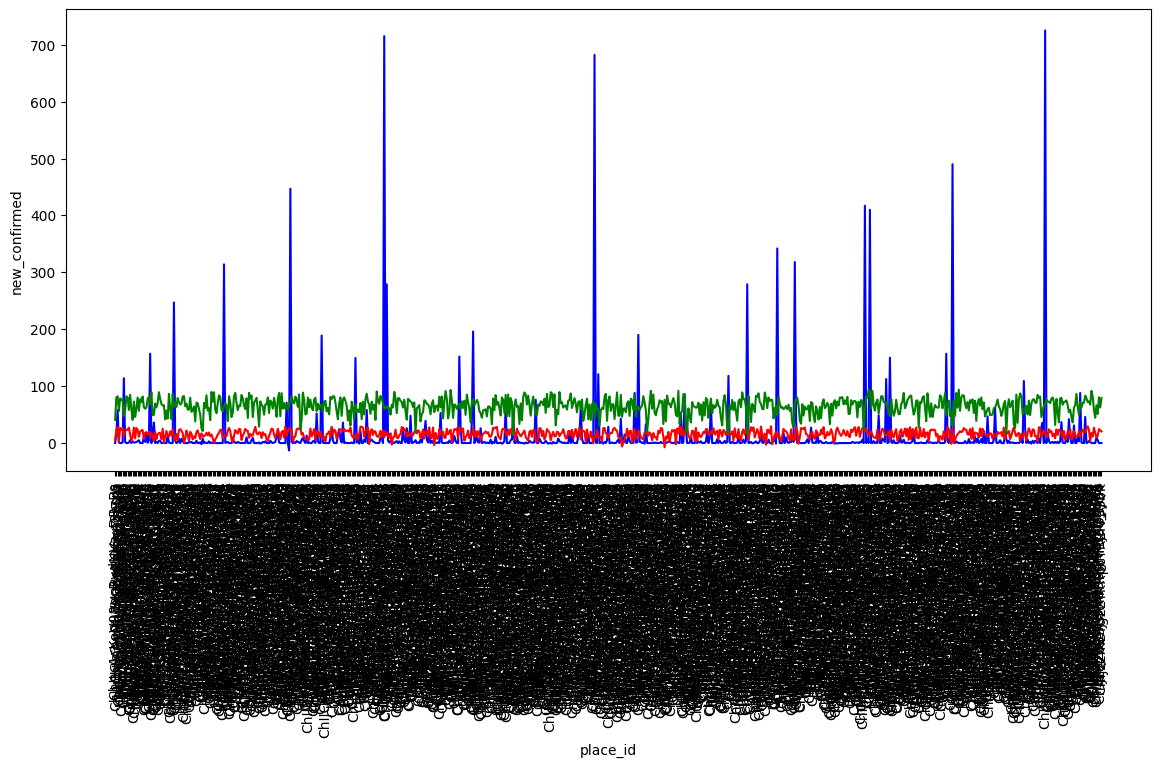

In [38]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=cases_sorted, x='place_id', y='new_confirmed', color='blue')
sns.lineplot(data=cases_sorted, x='place_id', y='average_temperature_celsius', color='red')
sns.lineplot(data=cases_sorted, x='place_id', y='relative_humidity', color='green')
plt.xticks(rotation=90)
plt.show()